<a href="https://colab.research.google.com/github/hnushrat/NYC-Taxi/blob/main/NYC_Taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

plt.rcParams["figure.figsize"] = (15,3)

In [176]:
df = pd.read_parquet('/content/yellow_tripdata_2024-12.parquet')

In [177]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-12-01 00:12:27,2024-12-01 00:31:12,1.0,9.76,1.0,N,138,33,1,38.0,6.0,0.5,4.72,0.00,1.0,51.97,0.0,1.75
1,2,2024-11-30 23:56:04,2024-12-01 00:28:15,1.0,7.62,1.0,N,158,42,1,37.3,1.0,0.5,8.46,0.00,1.0,50.76,2.5,0.00
2,2,2024-12-01 00:50:35,2024-12-01 01:24:46,4.0,20.07,2.0,N,132,236,2,70.0,0.0,0.5,0.00,6.94,1.0,82.69,2.5,1.75
3,2,2024-12-01 00:18:16,2024-12-01 00:33:16,3.0,2.34,1.0,N,142,186,1,15.6,1.0,0.5,4.12,0.00,1.0,24.72,2.5,0.00
4,2,2024-12-01 00:56:13,2024-12-01 01:18:25,1.0,5.05,1.0,N,107,80,1,26.8,1.0,0.5,5.00,0.00,1.0,36.80,2.5,0.00


In [178]:
# negative fare amounts are erronous
df = df[df['fare_amount'] >= 0]

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3589927 entries, 0 to 3668370
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            floa

In [180]:
# get missing values
df.isna().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,316585
trip_distance,0
RatecodeID,316585
store_and_fwd_flag,316585
PULocationID,0
DOLocationID,0
payment_type,0


In [181]:
# percentage of missing values
print(max(df.isna().sum()/len(df))*100)

8.818702998696073


In [182]:
# get duration of the journey in minutes

df['duration_of_journey'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration_of_journey'] = df['duration_of_journey'].dt.seconds/60

In [183]:
# get booking hour of the day
df['booking_hour'] = df['tpep_pickup_datetime'].dt.hour

In [184]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration_of_journey,booking_hour
0,2,2024-12-01 00:12:27,2024-12-01 00:31:12,1.0,9.76,1.0,N,138,33,1,38.0,6.0,0.5,4.72,0.00,1.0,51.97,0.0,1.75,18.750000,0
1,2,2024-11-30 23:56:04,2024-12-01 00:28:15,1.0,7.62,1.0,N,158,42,1,37.3,1.0,0.5,8.46,0.00,1.0,50.76,2.5,0.00,32.183333,23
2,2,2024-12-01 00:50:35,2024-12-01 01:24:46,4.0,20.07,2.0,N,132,236,2,70.0,0.0,0.5,0.00,6.94,1.0,82.69,2.5,1.75,34.183333,0
3,2,2024-12-01 00:18:16,2024-12-01 00:33:16,3.0,2.34,1.0,N,142,186,1,15.6,1.0,0.5,4.12,0.00,1.0,24.72,2.5,0.00,15.000000,0
4,2,2024-12-01 00:56:13,2024-12-01 01:18:25,1.0,5.05,1.0,N,107,80,1,26.8,1.0,0.5,5.00,0.00,1.0,36.80,2.5,0.00,22.200000,0


<Axes: xlabel='booking_hour', ylabel='count'>

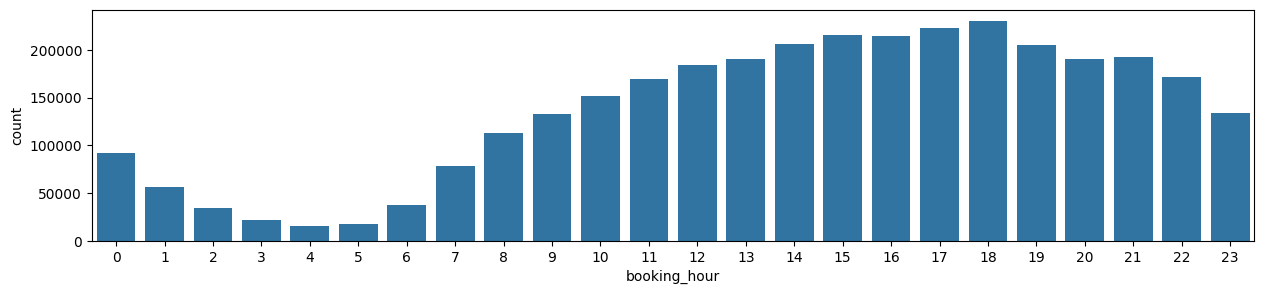

In [172]:
# number of bookings made at different hours
bookings_made = df['booking_hour'].value_counts()
sns.barplot(bookings_made)

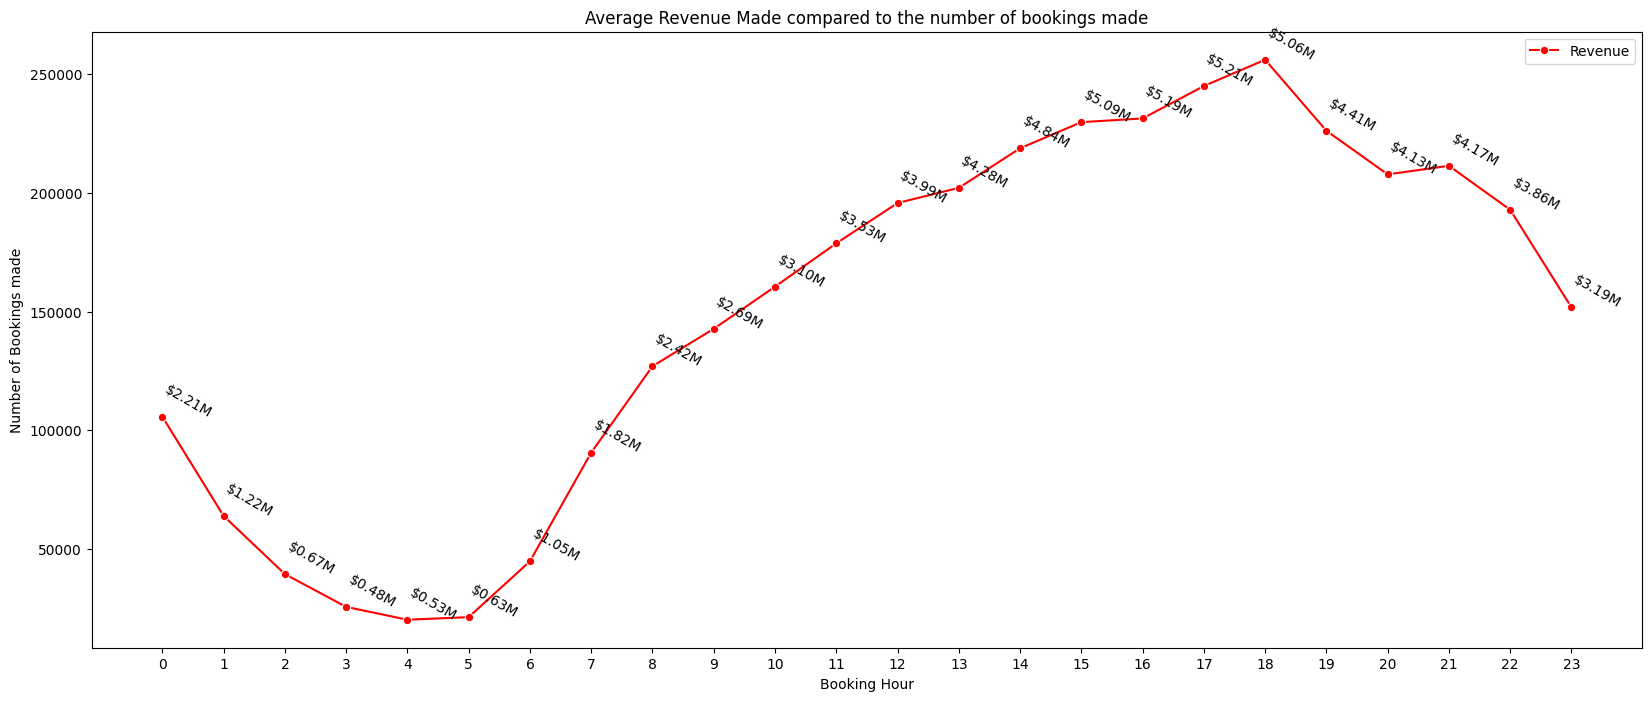

In [235]:
grouped_booking_hour = df.groupby(['booking_hour'])['fare_amount'].mean().reset_index(drop = True)

number_of_bookings = df['booking_hour'].value_counts()
number_of_bookings = number_of_bookings.reset_index().sort_values(by = 'booking_hour').reset_index(drop = True)

plt.figure(figsize = (20, 8))
plt.title('Average Revenue Made compared to the number of bookings made')
sns.lineplot(x = number_of_bookings['booking_hour'], y = number_of_bookings['count'], marker = 'o', color = 'r')

for (n, c) in enumerate(number_of_bookings['count'].values):

    plt.text(n, c, f'${number_of_bookings.iloc[n, 1] * grouped_booking_hour.iloc[n]*1e-6:.2f}M', rotation = 330)

plt.xticks(np.arange(24))
plt.xlabel('Booking Hour')
plt.ylabel('Number of Bookings made')
plt.legend(['Revenue'])
plt.show()

#####We can see bookings made between **1500 hours to 1700 hours** yield good revenue, though the **booking count is higher for 1800 hours**, still the revenue is less

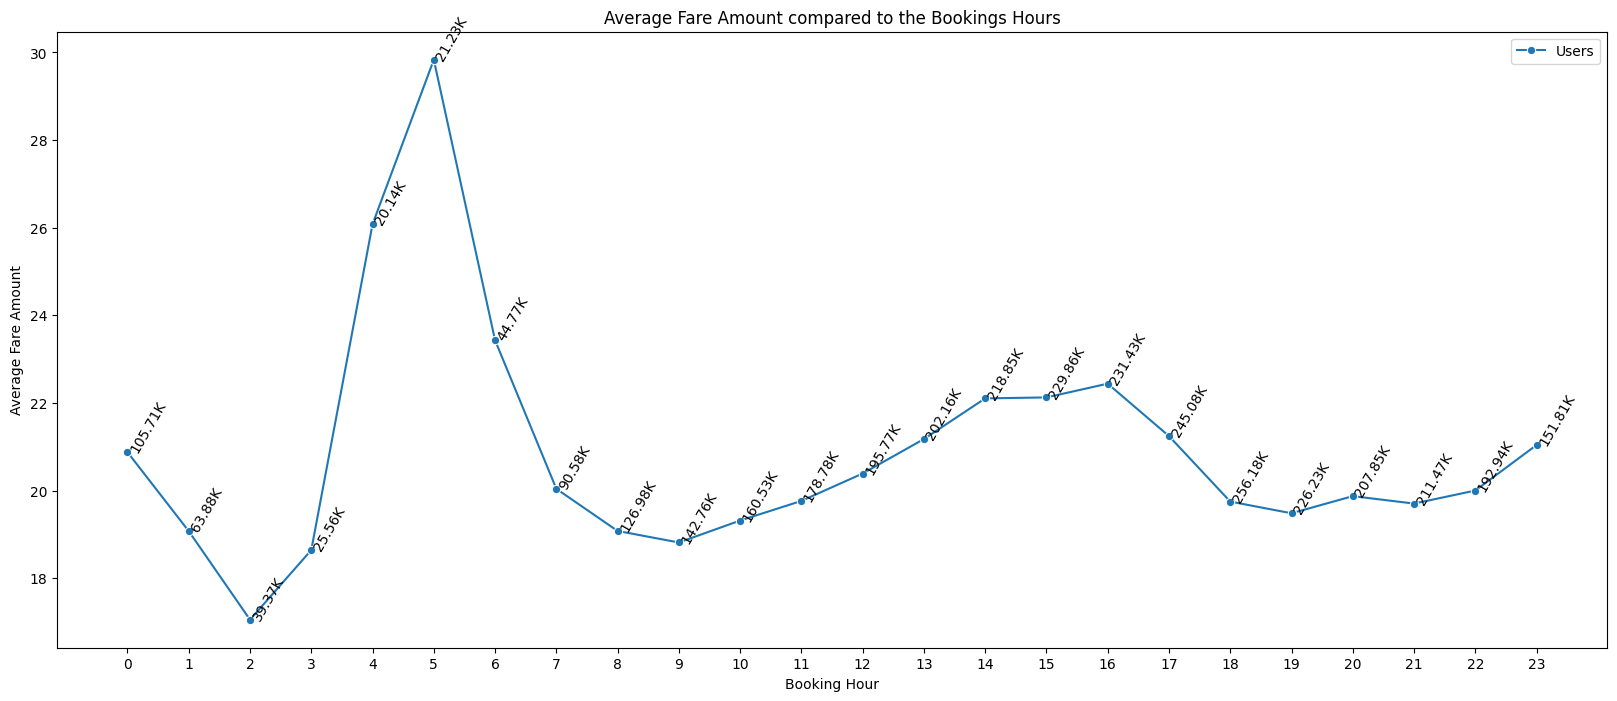

In [233]:
plt.figure(figsize = (20, 8))
plt.title('Average Fare Amount compared to the Bookings Hours')

sns.lineplot(grouped_booking_hour, marker = 'o')

for (n, c) in enumerate(grouped_booking_hour):

    plt.text(n, c, f'{number_of_bookings["count"][n]*1e-3:.2f}K', rotation = 60)

plt.xticks(np.arange(24))
plt.xlabel('Booking Hour')
plt.ylabel('Average Fare Amount')
plt.legend(['Users'])
plt.show()

#####Average Fare is very high for **0500 hours** and for the peak hours between **1500 to 1700 hours** is average

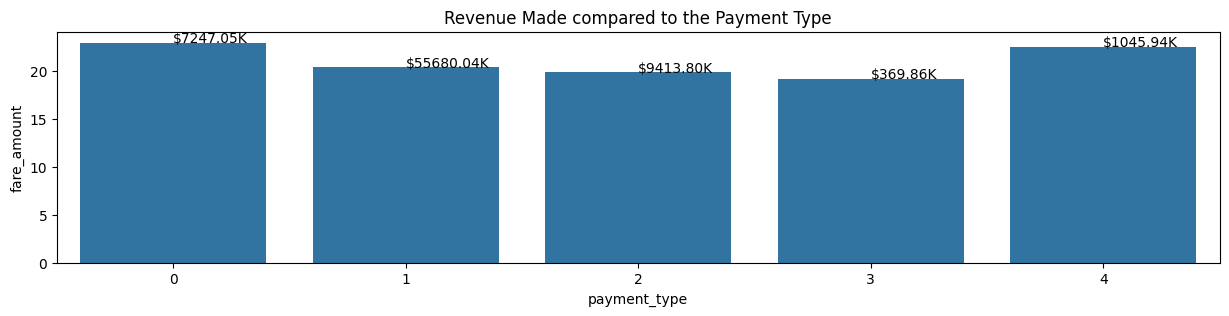

In [236]:
# see the payment type associated with fare amount
grouped_payment_type = df.groupby(['payment_type'])['fare_amount'].mean()

plt.title('Revenue Made compared to the Payment Type')
sns.barplot(grouped_payment_type)

revenue_made = []
for i in grouped_payment_type.index:
    x = df[df['payment_type'] == i]['fare_amount'].sum()
    revenue_made.append(x)

for (n, c) in enumerate(grouped_payment_type):
    plt.text(n, c, f'${revenue_made[n]/1e3:.2f}K')
    # plt.text(n, c, f'{revenue_made[n]}')

plt.show()


#####We can see given the **payment type 0** is most chosen, still more Revenue is generated by **payment type 1**